In [69]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import sys
sys.path.append('../')

In [71]:
import os
import sys
import pickle
import numpy as np
from toy_data import *
from targprop import *
from targprop_aunc_2 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
import pandas as pd
from tqdm import tqdm

In [72]:
mnist = mnist_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [113]:
out_dict = []
for _ in [0]:
  out_dict_ = train_net(batch_size=100,
                         t_steps=5000,
                         l_dim=[200, 100, 100, 3, 100, 100, 200],
                         alpha=0.0001,
                         alpha_t=1.0,
                         gamma=0.001,
                         err_alg=1,
                         mode='autoencoder',
                         dataset='mnist',
                         update_implementation='tf',
                         SGD=True,
                         preprocess=False)

  out_dict.append(out_dict_)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Run: 3


100%|██████████| 5001/5001 [11:26<00:00,  7.37it/s]


In [103]:
plt.plot(out_dict[0]['accuracy'])
plt.axhline(out_dict[0]['accuracy_test'])
plt.figure()
plt.plot(out_dict[0]['L'])
plt.axhline(out_dict[0]['L_test'])
plt.show()

KeyError: 'accuracy'

In [109]:
out_dict[0].keys()

['actvs', 'L', 'L_test']

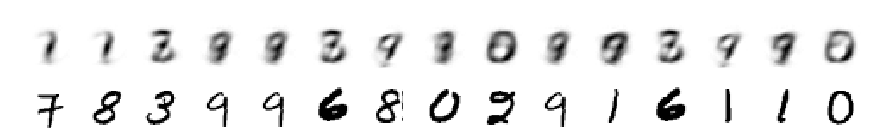

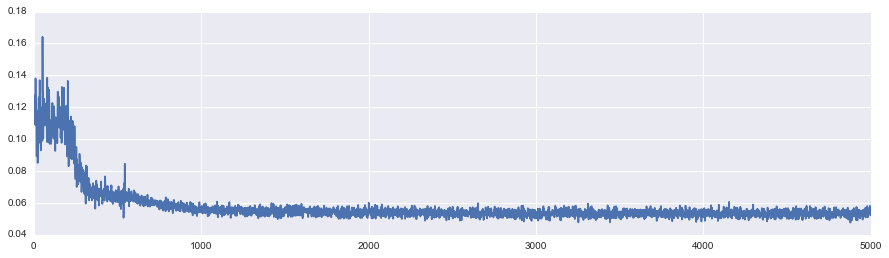

In [116]:
for ind in range(len(out_dict)):
  n = 15
  f, ax = plt.subplots(2, n, figsize=(n,2))
  np.random.seed(4)
  for col in range(n):
    example = np.random.randint(out_dict[ind]['actvs'].shape[0])
    ax[1, col].matshow(mnist.inputs[example].reshape((28,28)))
    ax[0, col].matshow(out_dict[ind]['actvs'][example].reshape((28,28)))
    ax[1, col].axis('off')
    ax[0, col].axis('off')
  plt.show()

  plt.figure(figsize=(n, 4))
  plt.plot(out_dict[ind]['L'])
  plt.show()

In [106]:
for ind in range(len(L)):
  n = 15
  f, ax = plt.subplots(2, n, figsize=(n,2))
  np.random.seed(4)
  for col in range(n):
    example = np.random.randint(actvs[ind].shape[0])
    ax[1, col].matshow(mnist.inputs[example].reshape((28,28)))
    ax[0, col].matshow(actvs[ind][example].reshape((28,28)))
    ax[1, col].axis('off')
    ax[0, col].axis('off')
  plt.show()

  plt.figure(figsize=(10, 2))
  plt.plot(L[ind][2000:])
  plt.show()

NameError: name 'L' is not defined

In [46]:
l_dim = [100, 50, 50, 3, 50, 50, 100]

In [48]:
layers = len(l_dim)+1

In [61]:
for l in range(layers/2+1, layers+1):
  print l, layers+1-l


5 4
6 3
7 2
8 1
